In [70]:
import requests
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import talib
from datetime import datetime

2y


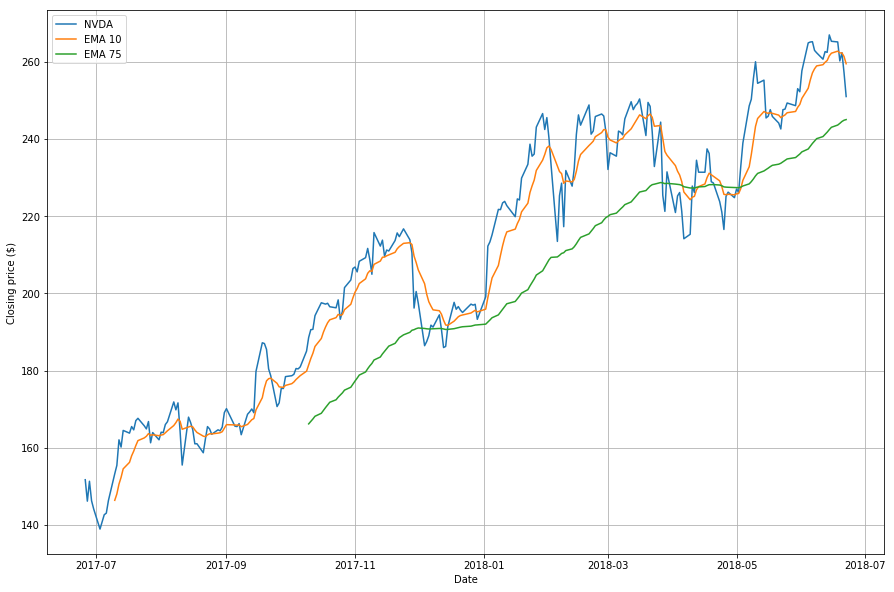

In [71]:

start = datetime(2017, 6, 25)
end = datetime(2018, 6, 25)
stock = 'NVDA'
df = web.DataReader(stock, 'iex', start, end)

fig, ax = plt.subplots(figsize=(15,10))
ema10 = talib.EMA(df.close, timeperiod=10)
ema75 = talib.EMA(df.close, timeperiod=75)
macd, macdsignal, macdhist = talib.MACD(df.close, fastperiod=12, slowperiod=26, signalperiod=9)
rsi = talib.RSI(df.close, timeperiod=14)

dates_list = [datetime.strptime(date, '%Y-%m-%d').date() for date in df.index]
delta = (dates_list[len(dates_list)-1] - dates_list[0])

df['ema10'] = ema10
df['ema75'] = ema75
df['macd'] = macd
df['macdsignal'] = macdsignal
df['macdhist'] = macdhist
df['rsi'] = rsi

ax.plot(dates_list, df.close, label=stock)
ax.plot(dates_list, ema10, label='EMA 10')
ax.plot(dates_list, ema75, label='EMA 75')

ax.set_xlabel('Date')
ax.set_ylabel('Closing price ($)')
ax.legend()

plt.grid(True)
plt.show()

# print(df.close[len(df)-5:])
# print(talib.EMA(df.close, timeperiod=10)[len(df)-5:])

In [72]:
df.tail(15)

,open,high,low,close,volume,ema10,ema75,macd,macdsignal,macdhist,rsi
date,,,,,,,,,,,
2018-06-04,259.000,265.7400,257.7000,264.85,16050641,253.092978,237.366927,5.349840,4.384411,0.965429,69.764343
2018-06-05,264.980,266.5900,263.1700,265.07,9792801,255.270618,238.095956,5.990384,4.705606,1.284778,69.906439
2018-06-06,261.430,265.2800,260.7700,265.15,9283856,257.066870,238.807904,6.430350,5.050554,1.379795,69.961721
2018-06-07,265.000,265.4785,259.2500,262.90,9236216,258.127439,239.441907,6.522285,5.344900,1.177384,66.274189
2018-06-08,259.960,264.0000,259.2000,262.28,9011443,258.882450,240.042909,6.470527,5.570026,0.900501,65.253547
2018-06-11,261.770,263.4500,260.1000,260.62,6634253,259.198368,240.584412,6.223816,5.700784,0.523032,62.479172
2018-06-12,261.690,263.0700,259.6600,262.58,7978985,259.813210,241.163243,6.115950,5.783817,0.332133,64.403592
2018-06-13,262.640,265.6700,262.0310,262.40,8455159,260.283536,241.722105,5.947384,5.816530,0.130854,64.078549
2018-06-14,264.220,269.2000,263.6200,266.91,10750411,261.488347,242.384944,6.107312,5.874687,0.232625,68.384072
